# Coursework #1

## Introduction

This coursework is concerned with building multi-layer networks to address the MNIST digit classification problem. It builds on the previous labs, in particular [02_MNIST_SLN.ipynb](02_MNIST_SLN.ipynb) in which single layer networks were trained for MNIST digit classification.   The course will involve extending that code to use Sigmoid and Softmax layers, combining these into multi-layer networks, and carrying out a number of MNIST digit classification experiments, to investigate the effect of learning rate, the number of hidden units, and the number of hidden layers.

The coursework is divided into 4 tasks:
* **Task 1**:   *Implementing a sigmoid layer* - 15 marks.  
This task involves extending the `Linear` class in file `mlp/layers.py` to `Sigmoid`, with code for forward prop, backprop computation of the gradient, and weight update.
* **Task 2**:  *Implementing a softmax layer* - 15 marks.  
This task involves extending the `Linear` class in file `mlp/layers.py` to `Softmax`, with code for forward prop, backprop computation of the gradient, and weight update.
* **Task 3**:  *Constructing a multi-layer network* - 40 marks.  
This task involves putting together a Sigmoid and a Softmax layer to create a multi-layer network, with one hidden layer (100 units) and one output layer, that is trained to classify MNIST digits.  This task will include reporting classification results, exploring the effect of learning rates, and plotting Hinton Diagrams for the hidden units and output units.
* **Task 4**:  *Experiments with different architectures*  - 30 marks.  
This task involves further MNIST classification experiments, primarily looking at the effect of using different numbers of hidden layers.
The coursework will be marked out of 100, and will contribute 30% of the total mark in the MLP course.

## Previous Tutorials

Before starting this coursework make sure that you have completed the first three labs:

* [00_Introduction.ipynb](00_Introduction.ipynb) - setting up your environment; *Solutions*: [00_Introduction_solution.ipynb](00_Introduction_solution.ipynb)
* [01_Linear_Models.ipynb](01_Linear_Models.ipynb) - training single layer networks; *Solutions*: [01_Linear_Models_solution.ipynb](01_Linear_Models_solution.ipynb)
* [02_MNIST_SLN.ipynb](02_MNIST_SLN.ipynb) - training a single layer network for MNIST digit classification

To ensure that your virtual environment is correct, please see [this note](https://github.com/CSTR-Edinburgh/mlpractical/blob/master/kernel_issue_fix.md) on the GitHub.
## Submission
**Submission Deadline:  Thursday 29 October, 16:00** 

Submit the coursework as an ipython notebook file, using the `submit` command in the terminal on a DICE machine. If your file is `03_MLP_Coursework1.ipynb` then you would enter:

`submit mlp 1 03_MLP_Coursework1.ipynb` 

where `mlp 1` indicates this is the first coursework of MLP.

After submitting, you should receive an email of acknowledgment from the system confirming that your submission has been received successfully. Keep the email as evidence of your coursework submission.

**Please make sure you submit a single `ipynb` file (and nothing else)!**

**Submission Deadline:  Thursday 29 October, 16:00** 



## Getting Started
Please enter your exam number and the date in the next code cell.

In [1]:
#MLP Coursework 1
#Exam number: B027639
#Date: 28/10/15



Please run the next code cell, which imports `numpy` and seeds the random number generator.  Please **do not** modify the random number generator seed!

In [1]:
import numpy

#Seed a random number generator running the below cell, but do **not** modify the seed.
rng = numpy.random.RandomState([2015,10,10])
rng_state = rng.get_state()

## Task 1 - Sigmoid Layer (15%)

In this task you need to create a class `Sigmoid` which encapsulates a layer of sigmoid units.  You should do this by extending the `mlp.layers.Linear` class (in file `mlp/layers.py`), which implements a a layer of linear units (i.e. weighted sum plus bias).  The `Sigmoid` class extends this by applying the sigmoid transfer function to the weighted sum in the forward propagation, and applying the derivative of the sigmoid in the gradient descent back propagation and computing the gradients with respect to layer's parameters. Do **not** copy the implementation provided in `Linear` class but rather, **reuse** it through inheritance.

When you have implemented `Sigmoid` (in the `mlp.layers` module), then please test it by running the below code cell.


In [3]:
from mlp.layers import Sigmoid

a = numpy.asarray([-20.1, 52.4, 0, 0.05, 0.05, 49])
b = numpy.asarray([-20.1, 52.4, 0, 0.05, 0.05, 49, 20, 20])

rng.set_state(rng_state)
sigm = Sigmoid(idim=a.shape[0], odim=b.shape[0], rng=rng)

fp = sigm.fprop(a)
deltas, ograds  = sigm.bprop(h=fp, igrads=b)

print fp.sum()
print deltas.sum()
print ograds.sum()
%precision 3
print fp
print deltas
print ograds


4.21941537867
25.9255147706
4.1105500626
[ 0.067  0.728  0.999  0.512  0.159  0.584  0.238  0.932]
[ -1.263e+00   1.037e+01   0.000e+00   1.249e-02   6.678e-03   1.191e+01
   3.628e+00   1.268e+00]
[ 1.406  0.078 -0.268  0.418  1.646  0.831]


***
To include the `Sigmoid` code in the notebook please run the below code cell.  (The `%load` notebook command is used to load the source of the `Sigmoid` class from `mlp/layers.py`.)

In [ ]:
# %load -s Sigmoid mlp/layers.py
class Sigmoid(Linear):
    def get_name(self):
        return 'sigmoid'

    @staticmethod
    def sigmoid(value):
        """
        This applies the sigmoid function to a single value
        :param value: the value to apply sigmoid to
        :return: the sigmoid output value
        """
        return 1.0/(1.0 + numpy.exp(-value))

    @staticmethod
    def sigmoid_prime(sigmoid):
        """
        This applies the sigmoid prime function to a single value
        :param value: the value to apply sigmoid prime to
        :return: the sigmoid output value
        """
        return sigmoid*(1.0-sigmoid)

    def fprop(self, inputs):
        layer_outputs = numpy.dot(inputs, self.W) + self.b
        vector_sigmoid = numpy.vectorize(self.sigmoid, otypes=[numpy.float])
        return vector_sigmoid(layer_outputs)

    def bprop(self, h, igrads):
        """
        :param h: it's an activation produced in forward pass
        :param igrads: current error
        :return:
        """
        vector_sigmoid_prime = numpy.vectorize(self.sigmoid_prime, otypes=[numpy.float])
        # deltas = igrads * dh^i/da^i
        # ograds = deltas \times da^i/dx^i
        deltas = igrads * vector_sigmoid_prime(h)
        ograds = numpy.dot(deltas, self.W.T)
        return deltas, ograds


## Task 2 - Softmax (15%)

In this task you need to create a class `Softmax` which encapsulates a layer of softmax units.  As in the previous task, you should do this by extending the `mlp.layers.Linear` class (in file `mlp/layers.py`).

When you have implemented `Softmax` (in the `mlp.layers` module), then please test it by running the below code cell.


In [5]:
from mlp.layers import Softmax

a = numpy.asarray([-20.1, 52.4, 0, 0.05, 0.05, 49])
b = numpy.asarray([0, 0, 0, 0, 0, 0, 0, 1])

rng.set_state(rng_state)
softmax = Softmax(idim=a.shape[0], odim=b.shape[0], rng=rng)

fp = softmax.fprop(a)
deltas, ograds = softmax.bprop_cost(h=None, igrads=fp-b, cost=None)

print fp.sum()
print deltas.sum()
print ograds.sum()
%precision 3
print fp
print deltas
print ograds


1.0
0.0
0.0744177068753
[  4.571e-05   1.697e-03   9.877e-01   6.631e-04   1.194e-04   8.880e-04
   1.977e-04   8.671e-03]
[  4.571e-05   1.697e-03   9.877e-01   6.631e-04   1.194e-04   8.880e-04
   1.977e-04  -9.913e-01]
[-0.089  0.03   0.079  0.011  0.017  0.027]


***
To include the `Softmax` code in the notebook please run the below code cell.  (The notebook `%load` command is used to load the source of the `Softmax` class from `mlp/layers.py`.)

In [ ]:
# %load -s Softmax mlp/layers.py
class Softmax(Linear):
    def get_name(self):
        return 'softmax'

    @staticmethod
    def softmax(sum_outputs):
        """
        Given a array of output units, normalize them using softmax. Each
        :param sum_outputs: the array of row probs which add to 1
        :return: a vector of normalized probability units
        """
        if sum_outputs.ndim > 1:
            # apply software individually to each row
            return numpy.asarray([Softmax.softmax(row) for row in sum_outputs])

        exp_sum = numpy.sum([numpy.exp(i) for i in sum_outputs])
        return numpy.asarray([numpy.exp(i)/exp_sum for i in sum_outputs])

    def fprop(self, inputs):
        layer_outputs = numpy.dot(inputs, self.W) + self.b
        return self.softmax(layer_outputs)

    def bprop(self, h, igrads):
        raise NotImplementedError()

    def bprop_cost(self, h, igrads, cost):
        ograds = numpy.dot(igrads, self.W.T)
        return igrads, ograds


## Task 3 - Multi-layer network for MNIST classification (40%)

**(a)** (20%)  Building on the single layer linear network for MNIST classification used in lab [02_MNIST_SLN.ipynb](02_MNIST_SLN.ipynb), and using the `Sigmoid` and `Softmax` classes that you implemented in tasks 1 and 2, construct and learn a model that classifies MNIST images and:
   * Has one hidden layer with a sigmoid transfer function and 100 units
   * Uses a softmax output layer to discriminate between the 10 digit classes (use the `mlp.costs.CECost()` cost)

Your code should print the final values of the error function and the classification accuracy for train, validation, and test sets (please keep also the log information printed by default by the optimiser). Limit the number of training epochs to 30. You can, of course, split your code across as many cells as you think is necessary.

In [7]:
# include here the complete code that constructs the model, performs training,
# and prints the error and accuracy for train/valid/testimport logging
import logging

from mlp.costs import MSECost, CECost  # import the cost we want to use for optimisation
from mlp.dataset import MNISTDataProvider  # import data provider
from mlp.layers import MLP, Sigmoid, Softmax  # import required layer types
from mlp.optimisers import SGDOptimiser  # import the optimiser
from mlp.schedulers import LearningRateFixed

logger = logging.getLogger()
logger.setLevel(logging.INFO)

# define the model structure
cost = CECost()
model = MLP(cost=cost)
model.add_layer(Sigmoid(idim=784, odim=100, rng=rng))
model.add_layer(Softmax(idim=100, odim=10, rng=rng))
# one can stack more layers here

# define the optimiser, here stochasitc gradient descent
# with fixed learning rate and max_epochs as stopping criterion
lr_scheduler = LearningRateFixed(learning_rate=0.01, max_epochs=30)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

logger.warning('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=100, max_num_batches=-10, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=100, max_num_batches=-10, randomize=False)

logger.warning('Training started...')
train_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)
train_accuracy = train_stats[-1][1]
train_cost = train_stats[-1][0]
valid_accuracy = valid_stats[-1][1]
valid_cost = valid_stats[-1][0]

logger.warning('Testing the model on test set:')
test_dp = MNISTDataProvider(dset='eval', batch_size=100, max_num_batches=-10, randomize=False)
cost, accuracy = optimiser.validate(model, test_dp)
logger.warning('MNIST training set accuracy is %.2f %% (cost is %.3f)' % (train_accuracy * 100., train_cost))
logger.warning('MNIST validation set accuracy is %.2f %% (cost is %.3f)' % (valid_accuracy * 100., valid_cost))
logger.warning('MNIST test set accuracy is %.2f %% (cost is %.3f)' % (accuracy * 100., cost))


INFO:mlp.optimisers:Epoch 0: Training cost (ce) for random model is 2.364. Accuracy is 8.62%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for random model is 2.362. Accuracy is 8.75%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 2.217. Accuracy is 35.57%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 2.107. Accuracy is 51.38%
INFO:mlp.optimisers:Epoch 1: Took 20 seconds. Training speed 2836 pps. Validation speed 4241 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 1.976. Accuracy is 61.38%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 1.813. Accuracy is 66.68%
INFO:mlp.optimisers:Epoch 2: Took 19 seconds. Training speed 3001 pps. Validation speed 4685 pps.
INFO:mlp.optimisers:Epoch 3: Training cost (ce) is 1.653. Accuracy is 69.55%
INFO:mlp.optimisers:Epoch 3: Validation cost (ce) is 1.464. Accuracy is 76.11%
INFO:mlp.optimisers:Epoch 3: Took 17 seconds. Training speed 3444 pps. Validation speed 4705 pps.
INFO:mlp.optimisers:Epoch 4: Training cost (ce) is

**(b)** (10%) Investigate the impact of different learning rates $\eta \in \{0.5, 0.2, 0.1, 0.05, 0.01, 0.005\}$ on the convergence of the network training as well as the final accuracy:
   * Plot (on a single graph) the error rate curves for each learning rate as a function of training epochs for training set
   * Plot (on another single graph) the error rate curves as a function of training epochs for validation set
   * Include a table of the corresponding error rates for test set

The notebook command `%matplotlib inline` ensures that your graphs will be added to the notebook, rather than opened as additional windows.

In [8]:
class ListTable(list):
    """ Overridden list class which takes a 2-dimensional list of 
        the form [[1,2,3],[4,5,6]], and renders an HTML Table in 
        IPython Notebook. """
    
    def _repr_html_(self):
        html = ["<table>"]
        for row in self:
            html.append("<tr>")
            
            for col in row:
                html.append("<td>{0}</td>".format(col))
            
            html.append("</tr>")
        html.append("</table>")
        return ''.join(html)

In [21]:
%matplotlib inline
import logging
import matplotlib.pyplot as plt

from mlp.costs import MSECost, CECost  # import the cost we want to use for optimisation
from mlp.dataset import MNISTDataProvider  # import data provider
from mlp.layers import MLP, Sigmoid, Softmax  # import required layer types
from mlp.optimisers import SGDOptimiser  # import the optimiser
from mlp.schedulers import LearningRateFixed

logger = logging.getLogger()
logger.setLevel(logging.WARNING)

learning_rates = [0.5, 0.2, 0.1, 0.05, 0.01, 0.005]

train_errors_matrix = []
valid_errors_matrix = []
test_errors = []

for learning_rate in learning_rates:
    # define the model structure
    cost = CECost()
    model = MLP(cost=cost)
    model.add_layer(Sigmoid(idim=784, odim=100, rng=rng))
    model.add_layer(Softmax(idim=100, odim=10, rng=rng))
    # one can stack more layers here
    # define the optimiser, here stochasitc gradient descent
    # with fixed learning rate and max_epochs as stopping criterion
    lr_scheduler = LearningRateFixed(learning_rate=learning_rate, max_epochs=30)
    optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

    logger.warning('Initialising data providers...')
    train_dp = MNISTDataProvider(dset='train', batch_size=100, max_num_batches=-10, randomize=True)
    valid_dp = MNISTDataProvider(dset='valid', batch_size=100, max_num_batches=-10, randomize=False)

    logger.warning('Training started...')
    train_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)

    logger.warning('Testing the model on test set...')
    test_dp = MNISTDataProvider(dset='eval', batch_size=100, max_num_batches=-10, randomize=False)
    cost, accuracy = optimiser.validate(model, test_dp)
    logger.warning('MNIST test set accuracy is %.2f %% (cost is %.3f)' % (accuracy * 100., cost))
    
    train_errors = [(1-train_stat[1]) for train_stat in train_stats]
    train_errors_matrix.append(train_errors)
    
    valid_errors = [(1-valid_stat[1]) for valid_stat in valid_stats]
    valid_errors_matrix.append(valid_errors)
    
    test_errors.append(1-accuracy)

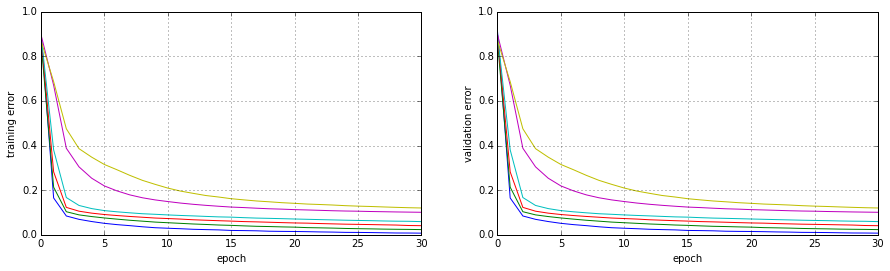

LR 0.5,LR 0.2,LR 0.1,LR 0.05,LR 0.01,LR 0.005
0.0237,0.0326,0.045,0.0592,0.0927,0.1093


In [29]:
fig, axis_array = plt.subplots(1, 2, figsize=(15, 4))

for train_errors in train_errors_matrix:
    axis_array[0].plot(train_errors, label='Eta %s' % (str(learning_rate)))
    
for valid_errors in train_errors_matrix:
    axis_array[1].plot(valid_errors, label='Eta %s' % (str(learning_rate)))
    
# show to line graphs using the training and validation results
axis_array[0].set_xlabel('epoch')
axis_array[0].set_ylabel('training error')  
# fig.legend(lines, labels, loc = (0.5, 0), ncol=5 )
axis_array[0].grid()

axis_array[1].set_xlabel('epoch')
axis_array[1].set_ylabel('validation error')
# axis_array[1].legend()
axis_array[1].grid()

plt.show()

# print a html table of the test errors
table = ListTable()
table.append(["LR " + str(learning_rate) for learning_rate in learning_rates])
table.append(test_errors)
table

**(c)** (10%) Plot the following graphs:
  * Display the 784-element weight vector of each of the 100 hidden units as 10x10 grid plot of 28x28 images, in order to visualise what features of the input they are encoding.  To do this, take the weight vector of each hidden unit, reshape to 28x28, and plot using the `imshow` function).
  * Plot a Hinton Diagram of the output layer weight matrix for digits 0 and 1

In [10]:
def hinton(matrix, max_weight=None, ax=None):
    """ Draw Hinton diagram for visualizing a weight matrix """
    ax = ax if ax is not None else plt.gca()

    if not max_weight:
        max_weight = 2 ** numpy.ceil(numpy.log(numpy.abs(matrix).max()) / numpy.log(2))

    ax.patch.set_facecolor('gray')
    ax.set_aspect('equal', 'box')
    ax.xaxis.set_major_locator(plt.NullLocator())
    ax.yaxis.set_major_locator(plt.NullLocator())

    for (x, y), w in numpy.ndenumerate(matrix):
        color = 'white' if w > 0 else 'black'
        size = numpy.sqrt(numpy.abs(w))
        rect = plt.Rectangle([x - size / 2, y - size / 2], size, size,
                             facecolor=color, edgecolor=color)
        ax.add_patch(rect)

    ax.autoscale_view()
    ax.invert_yaxis()

In [26]:
%matplotlib inline
import logging
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mlp.costs import CECost
from mlp.dataset import MNISTDataProvider
from mlp.layers import MLP, Sigmoid, Softmax
from mlp.optimisers import SGDOptimiser
from mlp.schedulers import LearningRateFixed

logger = logging.getLogger()
logger.setLevel(logging.WARNING)

cost = CECost()
model = MLP(cost=cost)
model.add_layer(Sigmoid(idim=784, odim=100, rng=rng))
model.add_layer(Softmax(idim=100, odim=10, rng=rng))

lr_scheduler = LearningRateFixed(learning_rate=0.5, max_epochs=30)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

logger.warning('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=100, max_num_batches=-10, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=100, max_num_batches=-10, randomize=False)

train_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)

test_dp = MNISTDataProvider(dset='eval', batch_size=100, max_num_batches=-10, randomize=False)
cost, accuracy = optimiser.validate(model, test_dp)
logger.warning('MNIST test set accuracy is %.2f %% (cost is %.3f)' % (accuracy * 100., cost))


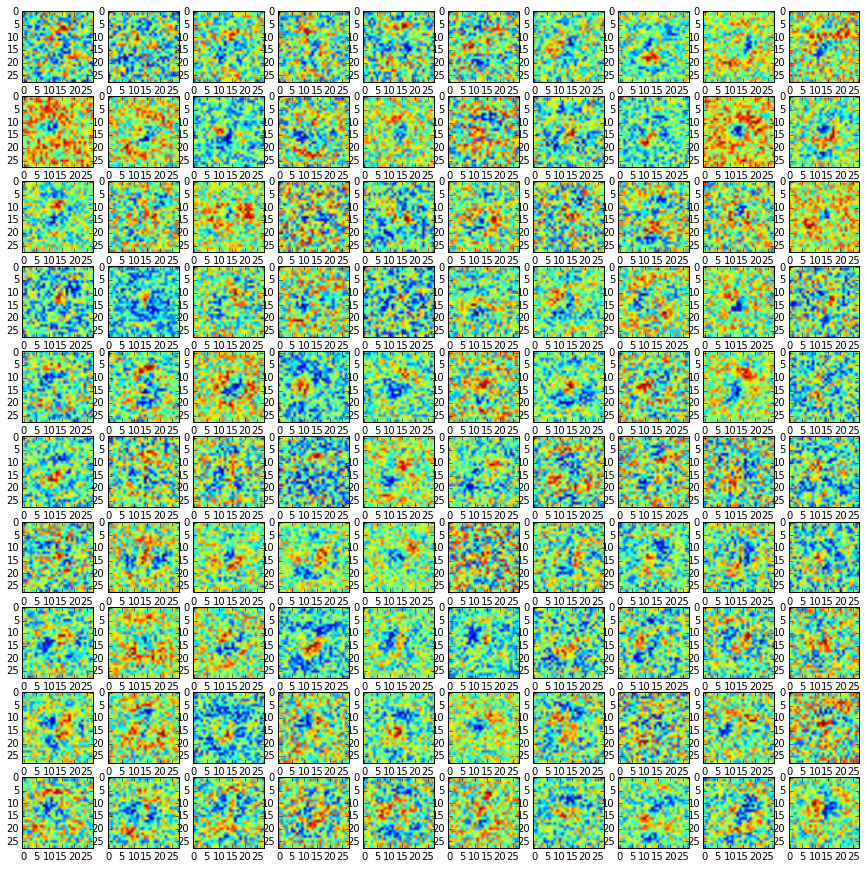

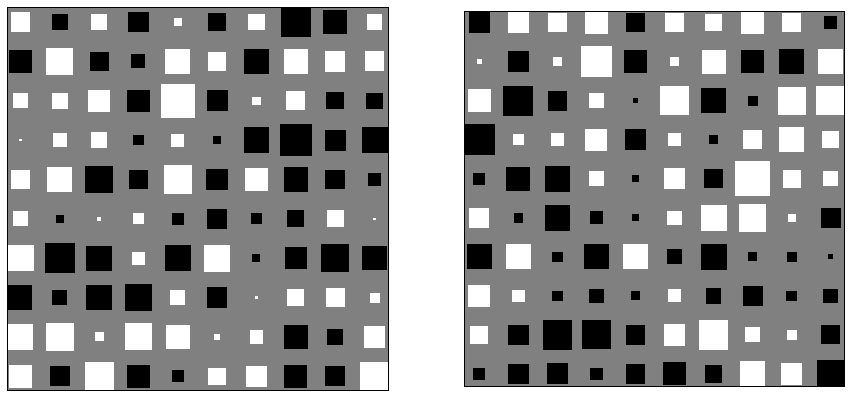

In [25]:
# extract the input weights for each hidden unit and show as an image
sigmoid_weights = model.layers[0].W.T
fig, axis_array = plt.subplots(10, 10, figsize=(15, 15))

for i in xrange(10):
    for j in xrange(10):
        k = i * 10 + j
        axis_array[i, j].imshow(sigmoid_weights[k].reshape(28, 28))
plt.show()

# extract the input weights for each softmax unit and show as a hinton diagram
softmax_weights = model.layers[1].W.T
fig2, axis_array2 = plt.subplots(1, 2, figsize=(15, 10))
for digit in xrange(2):
    hinton(softmax_weights[digit].reshape(10, 10), ax=axis_array2[digit])
plt.show()

## Task 4 - Experiments with 1-5 hidden layers (30%)

In this task use the learning rate which resulted in the best accuracy in your experiments in Task 3 (b).  Perform the following experiments:

  * Train a similar model to Task 3, with one hidden layer, but with 800 hidden units. 
  * Train 4 additional models with 2, 3, 4 and 5 hidden layers.  Set the number of hidden units for each model, such that all the models have similar number of trainable weights ($\pm$2%).   For simplicity, for a given model, keep the number of units in each hidden layer the same.
  * Plot value of the error function for training and validation sets as a function of training epochs for each model
  * Plot the test set classification accuracy as a function of the number of hidden layers


In [2]:
import logging
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from mlp.costs import CECost
from mlp.dataset import MNISTDataProvider
from mlp.layers import MLP, Sigmoid, Softmax
from mlp.optimisers import SGDOptimiser
from mlp.schedulers import LearningRateFixed

In [3]:
train_errors_matrix = []
valid_errors_matrix = []

In [4]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)

cost = CECost()
model = MLP(cost=cost)
model.add_layer(Sigmoid(idim=784, odim=800, rng=rng))
model.add_layer(Softmax(idim=800, odim=10, rng=rng))

lr_scheduler = LearningRateFixed(learning_rate=0.5, max_epochs=2)
optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

logger.warning('Initialising data providers...')
train_dp = MNISTDataProvider(dset='train', batch_size=100, max_num_batches=-10, randomize=True)
valid_dp = MNISTDataProvider(dset='valid', batch_size=100, max_num_batches=-10, randomize=False)

train_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)

test_dp = MNISTDataProvider(dset='eval', batch_size=100, max_num_batches=-10, randomize=False)
cost, accuracy = optimiser.validate(model, test_dp)
logger.warning('MNIST test set accuracy is %.2f %% (cost is %.3f)' % (accuracy * 100., cost))

train_errors = [(1-train_stat[1]) for train_stat in train_stats]
train_errors_matrix.append(train_errors)

valid_errors = [(1-valid_stat[1]) for valid_stat in valid_stats]
valid_errors_matrix.append(valid_errors)

INFO:mlp.optimisers:Epoch 0: Training cost (ce) for random model is 2.479. Accuracy is 9.29%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for random model is 2.468. Accuracy is 9.79%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 0.775. Accuracy is 84.15%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 0.301. Accuracy is 91.17%
INFO:mlp.optimisers:Epoch 1: Took 119 seconds. Training speed 480 pps. Validation speed 657 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 0.300. Accuracy is 91.13%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.267. Accuracy is 92.13%
INFO:mlp.optimisers:Epoch 2: Took 119 seconds. Training speed 482 pps. Validation speed 658 pps.


In [ ]:
def get_unit_count(layer_count):
    """
    For a given layer count, calculates the number of units per layer
    such that the total number of weights remains the same
    b = layer_count
    (784 * x) + ((b-1)*(x**2)) + (x * 10) = 635200
    ((b-1)*(x**2)) + (794 * x) - 635200 = 0
    """
    return (-794 + numpy.sqrt(794**2 - 4*(layer_count-1)*(-635200))) / (2 * (layer_count-1))

In [ ]:
logger = logging.getLogger()
logger.setLevel(logging.INFO)

# layer_params = [(2, get_unit_count(2)), (3, get_unit_count(3)), (4, get_unit_count(4)), (5, get_unit_count(5))]
layer_params = [(2, 493), (3, 398), (4, 346), (5, 311)]
test_accuracys = []

for layer_param in layer_params:
    layer_count, unit_count = layer_param
    cost = CECost()
    model = MLP(cost=cost)
    model.add_layer(Sigmoid(idim=784, odim=unit_count, rng=rng))
    for i in xrange(layer_count-1):
        model.add_layer(Sigmoid(idim=unit_count, odim=unit_count, rng=rng))
    model.add_layer(Softmax(idim=unit_count, odim=10, rng=rng))
    
    lr_scheduler = LearningRateFixed(learning_rate=0.5, max_epochs=2)
    optimiser = SGDOptimiser(lr_scheduler=lr_scheduler)

    logger.warning('Initialising data providers...')
    train_dp = MNISTDataProvider(dset='train', batch_size=100, max_num_batches=-10, randomize=True)
    valid_dp = MNISTDataProvider(dset='valid', batch_size=100, max_num_batches=-10, randomize=False)

    train_stats, valid_stats = optimiser.train(model, train_dp, valid_dp)

    test_dp = MNISTDataProvider(dset='eval', batch_size=100, max_num_batches=-10, randomize=False)
    cost, accuracy = optimiser.validate(model, test_dp)
    logger.warning('MNIST test set accuracy is %.2f %% (cost is %.3f)' % (accuracy * 100., cost))
    
    train_errors = [(1-train_stat[1]) for train_stat in train_stats]
    train_errors_matrix.append(train_errors)
    
    valid_errors = [(1-valid_stat[1]) for valid_stat in valid_stats]
    valid_errors_matrix.append(valid_errors)
    
    test_accuracys.append(accuracy)

INFO:mlp.optimisers:Epoch 0: Training cost (ce) for random model is 2.615. Accuracy is 9.90%
INFO:mlp.optimisers:Epoch 0: Validation cost (ce) for random model is 2.621. Accuracy is 9.67%
INFO:mlp.optimisers:Epoch 1: Training cost (ce) is 0.901. Accuracy is 71.28%
INFO:mlp.optimisers:Epoch 1: Validation cost (ce) is 0.375. Accuracy is 88.86%
INFO:mlp.optimisers:Epoch 1: Took 150 seconds. Training speed 386 pps. Validation speed 494 pps.
INFO:mlp.optimisers:Epoch 2: Training cost (ce) is 0.341. Accuracy is 89.81%
INFO:mlp.optimisers:Epoch 2: Validation cost (ce) is 0.295. Accuracy is 90.91%
INFO:mlp.optimisers:Epoch 2: Took 150 seconds. Training speed 382 pps. Validation speed 509 pps.


In [ ]:
fig, axis_array = plt.subplots(3, 1, figsize=(15, 4))

for i, train_errors in enumerate(train_errors_matrix):
    axis_array[0].plot(train_errors, label='Model %s' % (str(i)))
    
for i, valid_errors in enumerate(train_errors_matrix):
    axis_array[1].plot(valid_errors, label='Model %s' % (str(i)))
    
axis_array[2].plot(test_accuracys)
    
# show to line graphs using the training and validation results
axis_array[0].set_xlabel('epoch')
axis_array[0].set_ylabel('training error')  
# fig.legend(lines, labels, loc = (0.5, 0), ncol=5 )
axis_array[0].grid()

axis_array[1].set_xlabel('epoch')
axis_array[1].set_ylabel('validation error')
# axis_array[1].legend()
axis_array[1].grid()

axis_array[2].set_xlabel('layer count')
axis_array[2].set_ylabel('validation error')
# axis_array[2].legend()
axis_array[2].grid()

plt.show()

This is the end of coursework 1.

Please remember to save your notebook, and submit your notebook following the instructions at the top.  Please make sure that you have executed all the code cells when you submit the notebook.
